# What happened earlier ...
1. The features and the label were selected
1. The features were scaled (by standardizing them to a mean of 0 and std. deviation of 1)
1. Some of the data was used to test the selected classification model (linear regression)
1. After the training was done, the model was tested by applying it on the rest of the data

In [61]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing, svm, model_selection
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style # for more nice looking graphs

style.use('ggplot') # for specifying which graphic style to use

df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
#print(forecast_out)

df.tail()

df['label'] = df[forecast_col].shift(-forecast_out)
df.head()

X = np.array(df.drop(['label'],axis=1))
X = preprocessing.scale(X)

# extract data from the element with the index position -forecast_out up to the end of the list
# e.g. the last 30 days
X_lately = X[-forecast_out:]

# extract from the start to up to but not including -forecast_out
# e.g. all data up to but not including the last 30 days
X = X[:-forecast_out]

df.dropna(inplace=True)
y = np.array(df['label'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

In [59]:
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2018-01-30,1177.37,1.142604,-0.029718,1792602.0,1094.00
2018-01-31,1182.22,1.213207,-0.134312,1643877.0,1053.15
2018-02-01,1181.59,1.547000,0.476195,2774967.0,1026.55
2018-02-02,1119.20,1.811604,-0.729098,5798880.0,1054.09
2018-02-05,1068.76,5.512236,-2.893850,3742469.0,1006.94


### Prediction and Visualization
1. Create predicted stock prices for the future by using the trained and tested regression model
1. We want to append the predicted values into the dataframe
1. We extend the index by manipulating the datetime, append as many rows as the forecast_set has values
1. We put NaN values into feature columns and put the predicted value into the Forecast column (last column)
1. We plot the predicted values and the historical values over time

[1100.52913497 1074.05451046 1021.712739   1059.21402139 1073.74232082
 1074.07911204 1091.77037422 1110.69661092 1115.58275185 1123.15022053
 1133.1922253  1130.15868477 1148.43090639 1164.48417392 1137.25980403
 1123.54997804 1089.37760933 1102.33022435 1114.05851846 1121.69658366
 1134.66486267 1150.05182801 1180.76969065 1186.54825597 1158.88104032
 1169.44941252 1170.71427135 1154.26349019 1119.04006577 1115.23573442
 1113.74308189 1071.29629762 1044.16138838 1070.94415808 1022.49313971] 0.9775433164223993 35


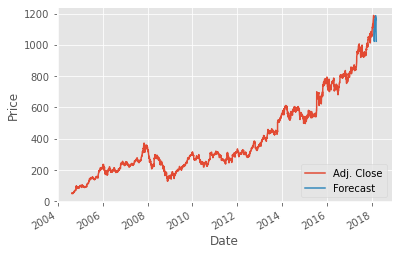

In [62]:
# predict the future development of the stock prices
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

# adds an empty column with nan values that will be used to hold the predicted values
df['Forecast'] = np.nan

# preparing time data for visualization

# take the timestamp/index of the last row
last_date = df.iloc[-1].name

# convert the data it into seconds (easier to add one day)
last_unix = last_date.timestamp()
one_day = 86400

# Calculate the timestamp for the next day after the last date
next_unix = last_unix + one_day

# Loop through the forecasted prices and add them to the DataFrame
for i in forecast_set:
    # converts the timestamp (in seconds) back into a date format (reverse operation of .timestamp())
    next_date = datetime.datetime.fromtimestamp(next_unix)
    
    # go to the next day
    next_unix += one_day
    
    # accesses the next_date row in the dataframe and puts nan values into all columns except the last one (predicted prices column)
    # the predicted price is added to the list of NaNs to fill the row and the predicted prices column
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
# Plot the actual adjusted closing prices and the forecasted prices using matplotlib
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [57]:
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2018-03-08 01:00:00,NaN,NaN,NaN,NaN,NaN,1199.146336
2018-03-09 01:00:00,NaN,NaN,NaN,NaN,NaN,1203.986872
2018-03-10 01:00:00,NaN,NaN,NaN,NaN,NaN,1202.693080
2018-03-11 01:00:00,NaN,NaN,NaN,NaN,NaN,1138.245286
2018-03-12 01:00:00,NaN,NaN,NaN,NaN,NaN,1082.958094


In [3]:
x = [1, 2, 3, 4, 5, 6]
y = x[:(-2)]
z = x[-2:]
print(y,z)

[1, 2, 3, 4] [5, 6]
